Hoje, como sabem, teremos nosso primeiro Workshop, neste dia daremos inicio a primeira parte do projeto integrador.
Vocês serão separados em grupos, de no máximo 5 pessoas e deverão trabalhar para entregar o trabalho conforme objetivos propostos.
Objetivos:
● Executar uma limpeza do conjunto de dados fornecido. Em particular, você precisará
elaborar estratégias para lidar com dados ausentes em determinadas variáveis.
● Realizar uma análise descritiva das principais variáveis.
● Criar novas colunas de determinados recursos que podem ter valor preditivo.
Vocês deverão entregar o trabalho da seguinte forma:
Apresente um relatório estruturado (PPT ou Google Slides). Este deve consistir em uma introdução (enunciado do problema, a pergunta, a descrição do conjunto de dados, etc.), um desenvolvimento das análises realizadas (análise descritiva, análise de correlação preliminar, visualizações preliminares) e uma apresentação dos principais resultados e conclusões.
################################################################################################################################
Observações
1- Se já tiverem pessoas que gostariam de fazer o trabalho em conjunto, interagem entre vocês e se organizem, na aula vou quebrar a turma em grupos e vocês deverão entrar na mesma sala para início do projeto ( max 5 pessoas)
2- Vocês trabalharão com o dataset que estou enviando aqui, é o dataset do enem SP, este dataset compreenderá o Workshop 1 e 2.
3- Início do trabalho hoje, entrega máxima dia 27/07/2022 e apresentação dia 01/08/2022
4- No dia da apresentação cada grupo deverá apresentar o ppt criado em no máximo 10 minutos, logo após a conclusão os professores irão dar um feedback.
5- Não haverá extensão de prazo, deveremos impreterivelmente receber Notebook + ppt no máximo até dia 27/07/2022.

(dá pra criar variável de faltas pelo TP_Presença)
(correlacionar nota com IDH, renda per capita dos municípios) - Percentil 99


Perguntas que queremos responder:
    
    Hipótese 1: Quem vai mal em matemática vai melhor em português (correlação exatas e humanas)
    Hipótese 2: Quanto maior a idade do indivíduo melhor a nota em nas disciplinas
    Hipótese 3: Quem tem acesso ao computador tira notas maiores.
    Hipótese 4: Quanto maior a escolaridade dos pais, maior a nota do aluno
    Hipótese 5: Tipo de escola que frequentou no ensino médio influencia na nota do aluno.
    Hipótese 6: Existe diferença de nota por gênero.
    

In [151]:
#Importando bibliotecas que iremos utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setando configurações de dataframe para mostrar 80 colunar e 80 linhas.
pd.set_option('display.max_columns', 80 )
pd.set_option('display.max_rows', 80)

In [152]:
#Atribuindo base de dados para variável df_enem
df_enem = pd.read_csv("C:\Arquivos Felipe\Ciencia de dados - Digital House\Desafio Enem_SP\enem_São Paulo.csv")

In [153]:
#Visualizando base de dados
df_enem

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200001334237,2020,4,M,1,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1,1,1,1,699.0,687.0,691.0,695.0,604.6,604.8,562.1,753.2,CECACBBCADACADDEEBDBCBAEEEEBDADABDCEEDDCCDCBC,EAADABBEABCADDBAAEDBCABDABAACAEAEEABECBBADEDB,CADDE99999AEEADBAAABEEECEEDADACBDECABEBEADBCCB...,BABADDBDAEBAEBBBEEDEEECBCEBBDACCEABDCCBADDCCE,0,DEAAECBBCDCBAEBEEBDBCCACECCDACDABDDBADDECBEBA,EAAADBBEDBDACDBCCDEBDBBCBBADCAECDBABDBCBADEDB,CADDE99999DEBBBBBAADBECBEACCBECEDAEABEECBDCCAD...,BABBDABAEEBACBACDEDEEXCACEBBADCBEABADCBADDCCE,1.0,140.0,120.0,120.0,120.0,100.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200004902048,2020,6,M,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,7.0,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,C,B,B,B
2,200005550767,2020,2,F,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,B,3.0,D,A,B,C,B,A,B,B,B,A,B,A,B,D,A,B,D,B,B,B
3,200001141912,2020,2,M,3,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1,1,1,1,597.0,569.0,580.0,587.0,439.6,395.6,505.7,339.2,DDDCAAEBBCACACCCCAABBACDBEADACDCAABCACCCDAAEA,ADABADCCAECACEBACEADBBDDCDBBBCEDAAAAEAAACDBAE,ACCEA99999BACABDAEBBCADBEEEEECEEADEEAAEABDCECC...,CECDACBDADBACBDAEDDBECAEACDDDCCCCCACABEDADBAD,0,DDBACBDDDECDAEDCCCEDBDDCBDDCAAECEDDACCBAEDCDX,DECCADEBDECBBECDDCBACDBDEEDABCDDAEDBECECBCCBD,DCEAAEEEACAACBBEBEBAAADBBAEBCEDBAADADDEADEBDAC...,DABCCAEDBBCCCABCACCBDXCCCBEEEDBBACCDACBAEBAEC,1.0,60.0,40.0,40.0,100.0,40.0,280.0,D,E,C,B,4.0,C,A,B,C,B,A,B,B,B,A,B,A,A,C,A,A,D,A,A,B
4,200004149124,2020,5,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1,1,1,1,598.0,567.0,577.0,588.0,447.4,599.6,528.2,627.8,AEBDBBCEAEBDECDDCCADDBDAABACECCCEACCCDABDEDAE,ADADBADAACDEBEEBCAEDDACEDCACECEDCDCABAEBBECDB,99999AEACDABDBEBBEDBECBDADADABDDCBCDBBEADCBCDB...,EDCBCDDEDBCABCCCCDBCDACBADCEADADCCEEBAAAECBCA,1,CEDBDDDCACCBDAEBADCBDCDXAAECEDDDECDDCBDDAEDCC,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,1.0,140.0,200.0,140.0,200.0,180.0,860.0,B,C,A,B,4.0,B,A,B,D,B,A,B,A,A,A,B,A,A,B,A,A,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250470,200005233814,2020,8,F,1,3,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,C,C,B,3.0,F,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,D,A,A,B
250471,200004099015,2020,11,F,1,2,1,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [154]:
#Visualizando tamanho do data frame
df_enem.shape

(250475, 76)

In [155]:
#Visualizando tipos de dados das colunas
df_enem.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

In [156]:
#Visualizando quantidade de valores distintos (únicos) nas colunas
df_enem.nunique()

NU_INSCRICAO              250475
NU_ANO                         1
TP_FAIXA_ETARIA               20
TP_SEXO                        2
TP_ESTADO_CIVIL                5
TP_COR_RACA                    6
TP_NACIONALIDADE               5
TP_ST_CONCLUSAO                4
TP_ANO_CONCLUIU               15
TP_ESCOLA                      3
TP_ENSINO                      2
IN_TREINEIRO                   2
CO_MUNICIPIO_ESC             223
NO_MUNICIPIO_ESC             223
CO_UF_ESC                     19
SG_UF_ESC                     19
TP_DEPENDENCIA_ADM_ESC         4
TP_LOCALIZACAO_ESC             2
TP_SIT_FUNC_ESC                4
CO_MUNICIPIO_PROVA             1
NO_MUNICIPIO_PROVA             1
CO_UF_PROVA                    1
SG_UF_PROVA                    1
TP_PRESENCA_CN                 3
TP_PRESENCA_CH                 3
TP_PRESENCA_LC                 3
TP_PRESENCA_MT                 3
CO_PROVA_CN                   14
CO_PROVA_CH                   14
CO_PROVA_LC                   14
CO_PROVA_M

In [157]:
#VIsualizando quantidade de indices duplicados
df_enem.duplicated().sum()

0

In [158]:
#Verifica colunas que possuem apenas um valor
df_enem.columns[df_enem.nunique()==1]

Index(['NU_ANO', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA'],
      dtype='object')

In [159]:
#Visualizando quantidade de dados NaN (not a number)
df_enem.isna().sum()

NU_INSCRICAO                   0
NU_ANO                         0
TP_FAIXA_ETARIA                0
TP_SEXO                        0
TP_ESTADO_CIVIL                0
TP_COR_RACA                    0
TP_NACIONALIDADE               0
TP_ST_CONCLUSAO                0
TP_ANO_CONCLUIU                0
TP_ESCOLA                      0
TP_ENSINO                 201090
IN_TREINEIRO                   0
CO_MUNICIPIO_ESC          213160
NO_MUNICIPIO_ESC          213160
CO_UF_ESC                 213160
SG_UF_ESC                 213160
TP_DEPENDENCIA_ADM_ESC    213160
TP_LOCALIZACAO_ESC        213160
TP_SIT_FUNC_ESC           213160
CO_MUNICIPIO_PROVA             0
NO_MUNICIPIO_PROVA             0
CO_UF_PROVA                    0
SG_UF_PROVA                    0
TP_PRESENCA_CN                 0
TP_PRESENCA_CH                 0
TP_PRESENCA_LC                 0
TP_PRESENCA_MT                 0
CO_PROVA_CN               147899
CO_PROVA_CH               140143
CO_PROVA_LC               140143
CO_PROVA_M

In [160]:
#Fazendo uma cópia do dataframe para manipulá-lo
df_enem_copy=df_enem.copy()

In [161]:
#Iniciando limpeza de dados

#Removendo NaN da coluna "NU_NOTA_COMP1"
df_enem_num = df_enem_copy.dropna(subset=["NU_NOTA_COMP1"])

#Substituindo NaN da coluna "TP_ENSINO" pelo número 4
df_enem_num["TP_ENSINO"]=df_enem_num["TP_ENSINO"].fillna(4)



C:\Users\epile\AppData\Local\Temp\ipykernel_12568\2687016834.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enem_num["TP_ENSINO"]=df_enem_num["TP_ENSINO"].fillna(4)


In [162]:
#Atribuindo sequência de colunas a uma lista
lista_colunas = ["CO_MUNICIPIO_ESC","NO_MUNICIPIO_ESC","CO_UF_ESC","SG_UF_ESC","TP_DEPENDENCIA_ADM_ESC","TP_LOCALIZACAO_ESC","TP_SIT_FUNC_ESC"]

#Substituindo NaN das colunas da lista pelo valor 0
df_enem_num[lista_colunas]=df_enem_num[lista_colunas].fillna(0)

C:\Users\epile\AppData\Local\Temp\ipykernel_12568\1170108936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enem_num[lista_colunas]=df_enem_num[lista_colunas].fillna(0)


In [163]:
#Visualizando quantidade de Nan
df_enem_num.isna().sum()

NU_INSCRICAO                 0
NU_ANO                       0
TP_FAIXA_ETARIA              0
TP_SEXO                      0
TP_ESTADO_CIVIL              0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                    0
IN_TREINEIRO                 0
CO_MUNICIPIO_ESC             0
NO_MUNICIPIO_ESC             0
CO_UF_ESC                    0
SG_UF_ESC                    0
TP_DEPENDENCIA_ADM_ESC       0
TP_LOCALIZACAO_ESC           0
TP_SIT_FUNC_ESC              0
CO_MUNICIPIO_PROVA           0
NO_MUNICIPIO_PROVA           0
CO_UF_PROVA                  0
SG_UF_PROVA                  0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
CO_PROVA_CN               8251
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT               8251
NU_NOTA_CN                8251
NU_NOTA_

In [164]:
#Removendo NaN da coluna "NU_NOTA_CN"
df_enem_num = df_enem_num.dropna(subset=["NU_NOTA_CN"])

#Fazendo uma cópia do dataframe df_enem
df_enem_limpa = df_enem_num.copy() 

#Visualizando as colunas do df_enem_limpa
df_enem_limpa.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='NU_NOTA_LC'>

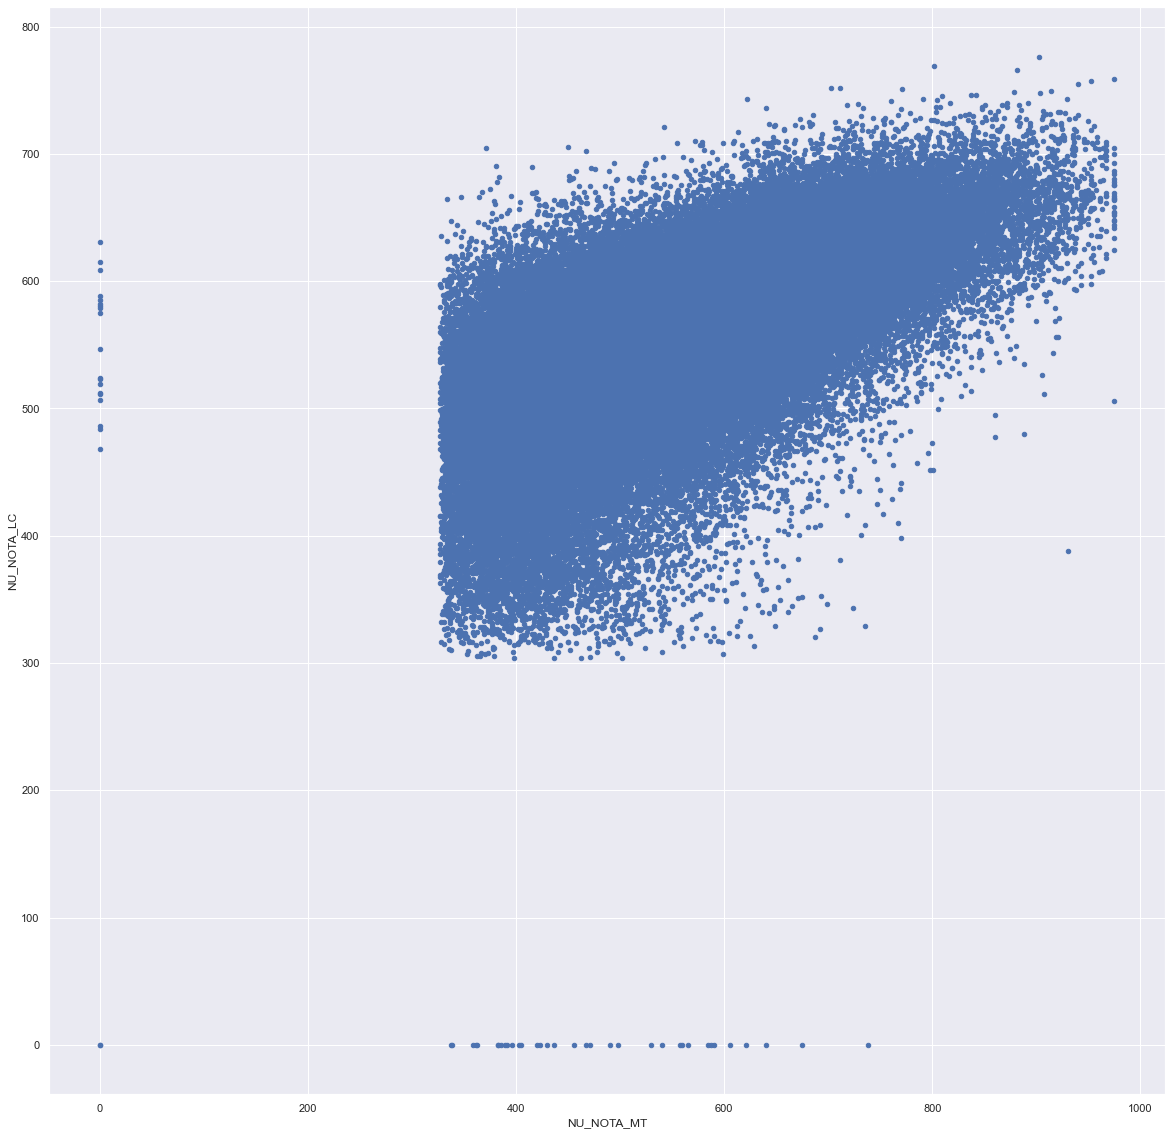

In [165]:
#Hipótese 1: Quem vai mal em matemática vai melhor em português (correlação exatas e humanas)

sns.set(rc={'figure.figsize':(20,20)}) #Ampliando tamanho da figura
df_enem_limpa.plot.scatter(x='NU_NOTA_MT',y='NU_NOTA_LC') #Plotando gráfico tipo Scatterplot com os eixos de Nota de Matemática e Lingua Portuguesa

#Nota-se que há uma correlação positiva entre as duas variáveis, indicando que em geral quem vai bem em uma das disciplinas
#tem maior probabilidade de também ir bem na outra disciplina.

In [166]:
#Hipótese 2: Quanto maior a idade do indivíduo melhor a nota nas disciplinas

#Agrupando a média das notas pelas faixas etárias
df_enem_idade_nota = df_enem_limpa.groupby(by='TP_FAIXA_ETARIA')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()
df_enem_idade_nota

C:\Users\epile\AppData\Local\Temp\ipykernel_12568\2615079026.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_enem_idade_nota = df_enem_limpa.groupby(by='TP_FAIXA_ETARIA')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
TP_FAIXA_ETARIA,,,,
1,525.122113,557.356695,565.779053,594.231957
2,516.455179,549.402527,559.921293,573.454453
3,518.343865,550.194924,558.306345,568.821964
4,521.030248,552.183394,558.746143,569.530061
5,520.801652,553.985616,559.414640,568.387297
6,517.930162,549.720379,556.346957,559.517876
7,509.264816,543.558908,552.264249,550.834050
8,509.422290,542.793425,552.025470,547.069184
9,504.572631,541.363596,550.400353,542.166858


<AxesSubplot:xlabel='TP_FAIXA_ETARIA', ylabel='NU_NOTA_LC'>

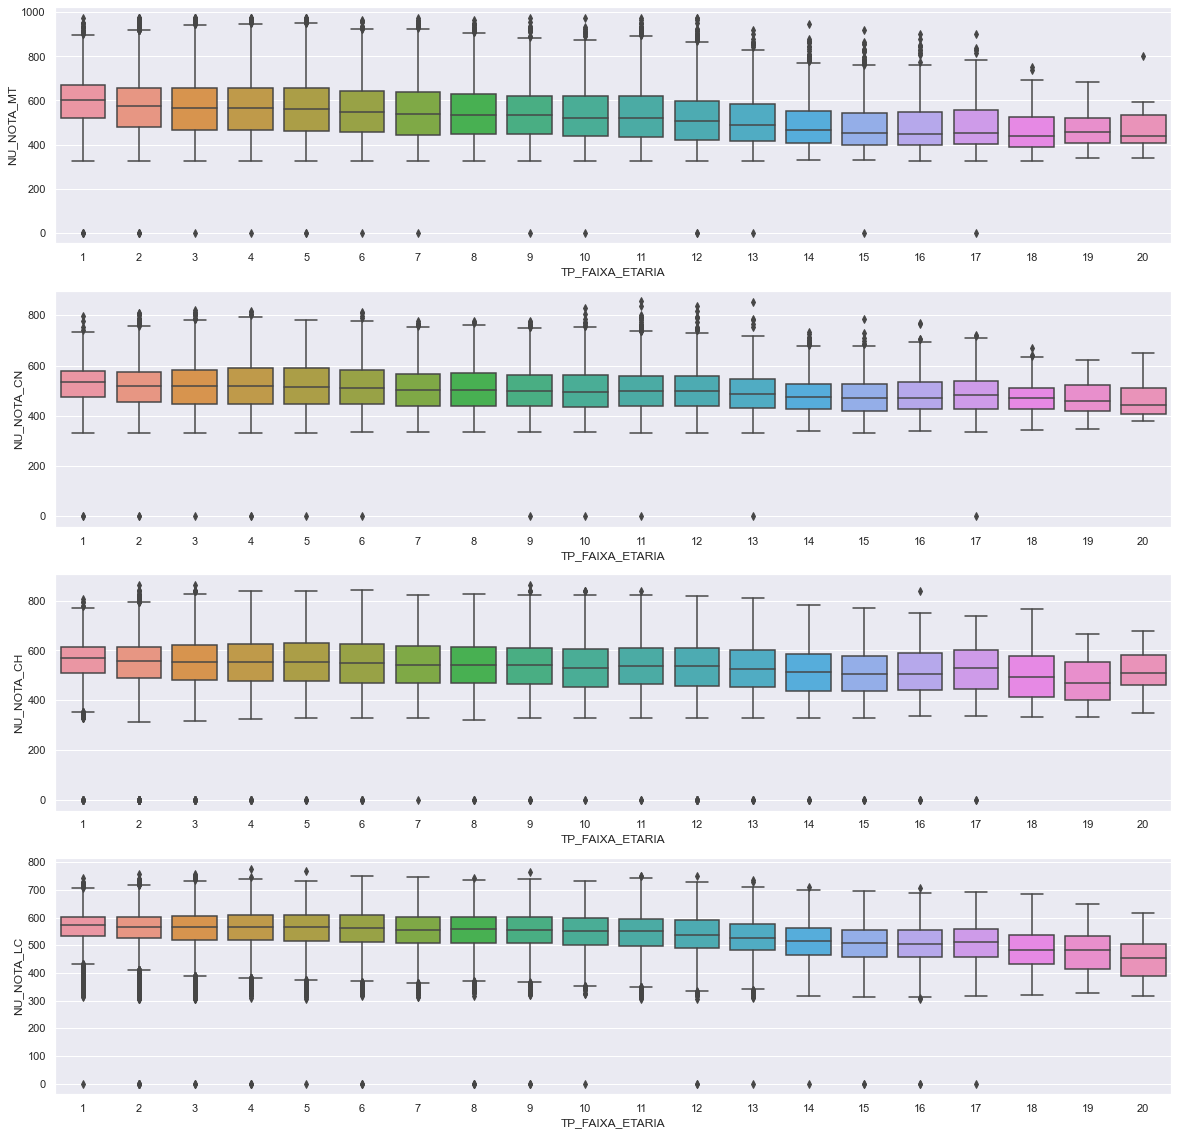

<Figure size 720x1440 with 0 Axes>

In [167]:
#Plotando gráfico tipo boxplot para visualizar relação entre faixa etária e notas.
fig, axs = plt.subplots(nrows=4)
plt.figure(figsize = (10, 20))
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x='TP_FAIXA_ETARIA', y='NU_NOTA_MT', data=df_enem_limpa, ax=axs[0])
sns.boxplot(x='TP_FAIXA_ETARIA', y='NU_NOTA_CN', data=df_enem_limpa, ax=axs[1])
sns.boxplot(x='TP_FAIXA_ETARIA',y='NU_NOTA_CH', data=df_enem_limpa, ax=axs[2])
sns.boxplot(x='TP_FAIXA_ETARIA',y='NU_NOTA_LC', data=df_enem_limpa, ax=axs[3])


#Nota-se que em geral, com o aumento da faixa etária há uma redução na nota dos participantes.

<AxesSubplot:xlabel='Q024', ylabel='NU_NOTA_LC'>

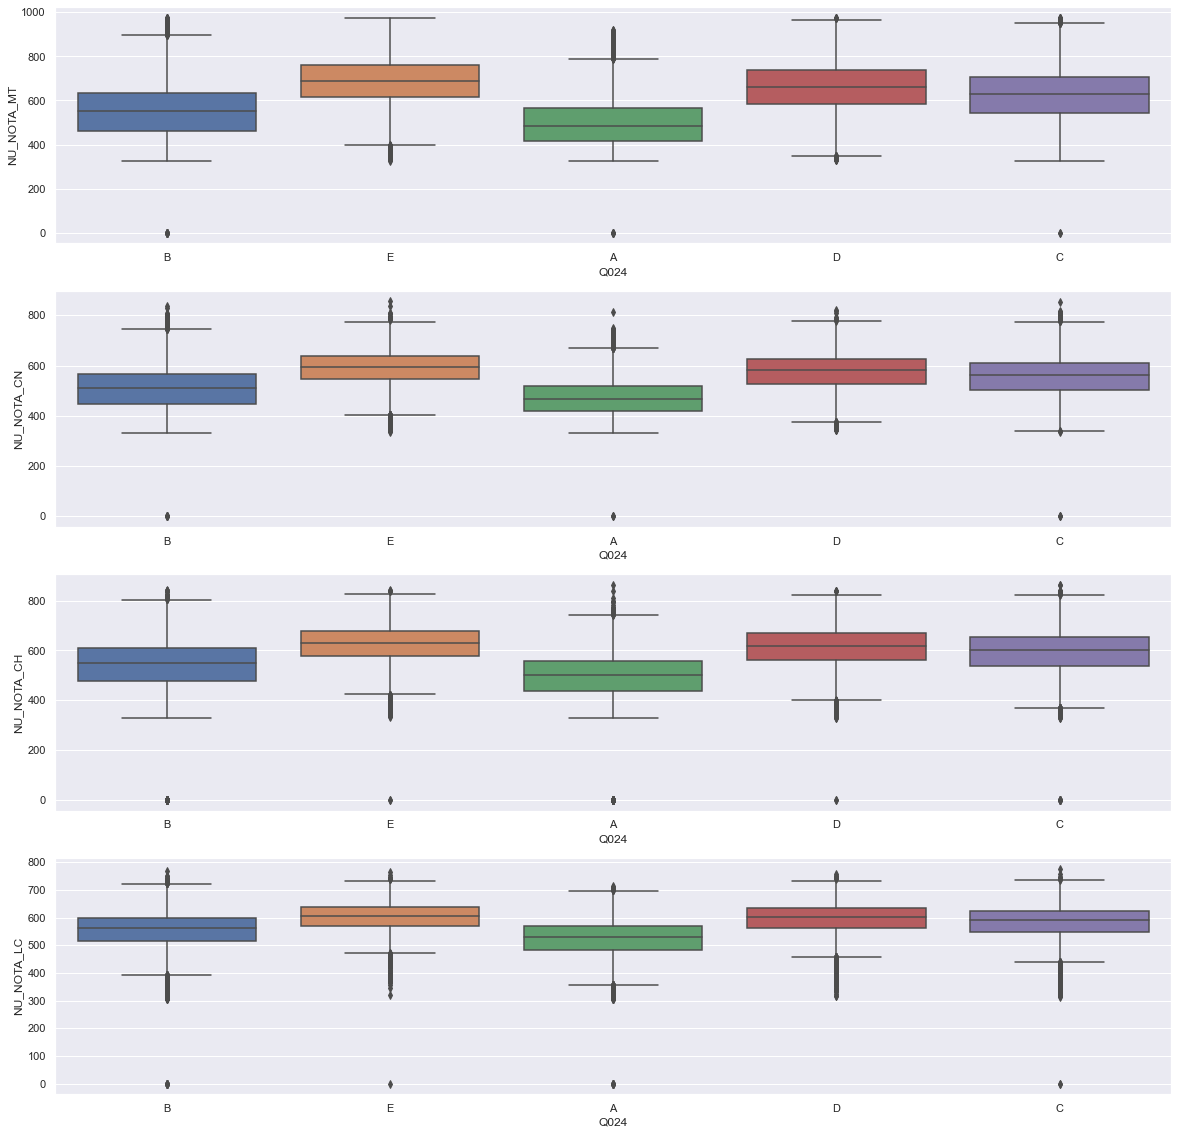

<Figure size 720x1440 with 0 Axes>

In [168]:
#Hipótese 3: Quem tem acesso ao computador tira notas maiores.
#Plotando gráfico tipo boxplot para visualizar relação entre acesso ao computador e notas.
df_enem_limpa_ord0 = df_enem_limpa.sort_values(by= ['Q024'])
fig, axs = plt.subplots(nrows=4)
plt.figure(figsize = (10, 20))
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x='Q024', y='NU_NOTA_MT', data=df_enem_limpa_ord, ax=axs[0])
sns.boxplot(x='Q024', y='NU_NOTA_CN', data=df_enem_limpa_ord, ax=axs[1])
sns.boxplot(x='Q024',y='NU_NOTA_CH', data=df_enem_limpa_ord, ax=axs[2])
sns.boxplot(x='Q024',y='NU_NOTA_LC', data=df_enem_limpa_ord, ax=axs[3])

<AxesSubplot:xlabel='Q001', ylabel='NU_NOTA_LC'>

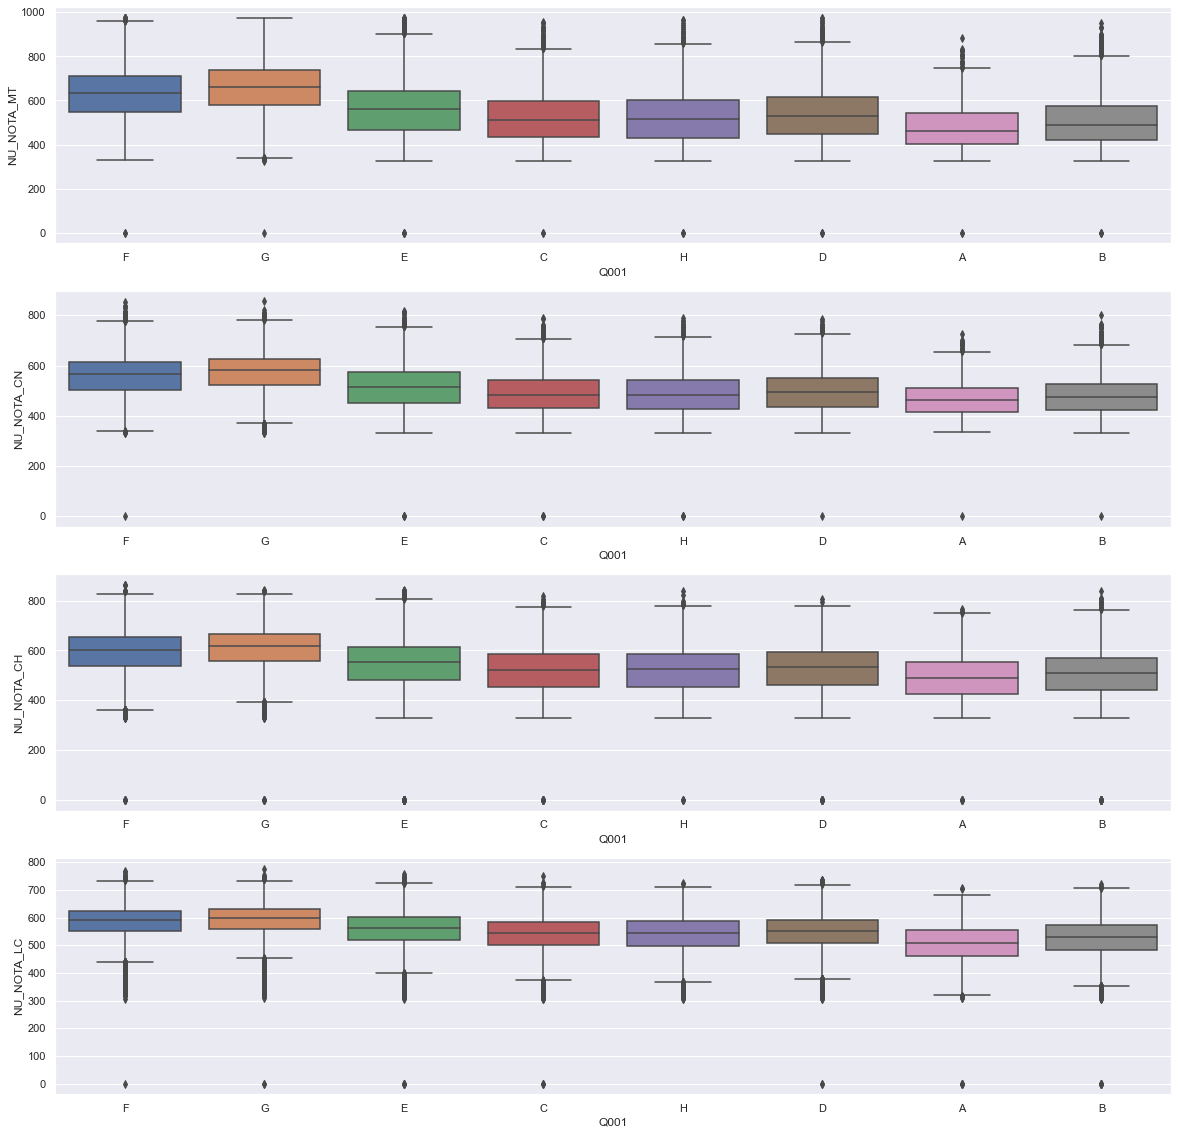

<Figure size 720x1440 with 0 Axes>

In [169]:
#Hipótese 4: Quanto maior a escolaridade dos pais, maior a nota do aluno (criar coluna com a descrição)

#Plotando gráfico com a questão 1 do questionário, questão que pergunta a escolaridade do pai
df_enem_limpa_ord1 = df_enem_limpa.sort_values(by= ['Q001'])
fig, axs = plt.subplots(nrows=4)
plt.figure(figsize = (10, 20))
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x='Q001', y='NU_NOTA_MT', data=df_enem_limpa_ord, ax=axs[0])
sns.boxplot(x='Q001', y='NU_NOTA_CN', data=df_enem_limpa_ord, ax=axs[1])
sns.boxplot(x='Q001',y='NU_NOTA_CH', data=df_enem_limpa_ord, ax=axs[2])
sns.boxplot(x='Q001',y='NU_NOTA_LC', data=df_enem_limpa_ord, ax=axs[3])

#Nota-se que quanto maior a escolaridade do pai, aumenta as chance de o aluno ter uma nota maior nas disciplinas.

<AxesSubplot:xlabel='Q002', ylabel='NU_NOTA_LC'>

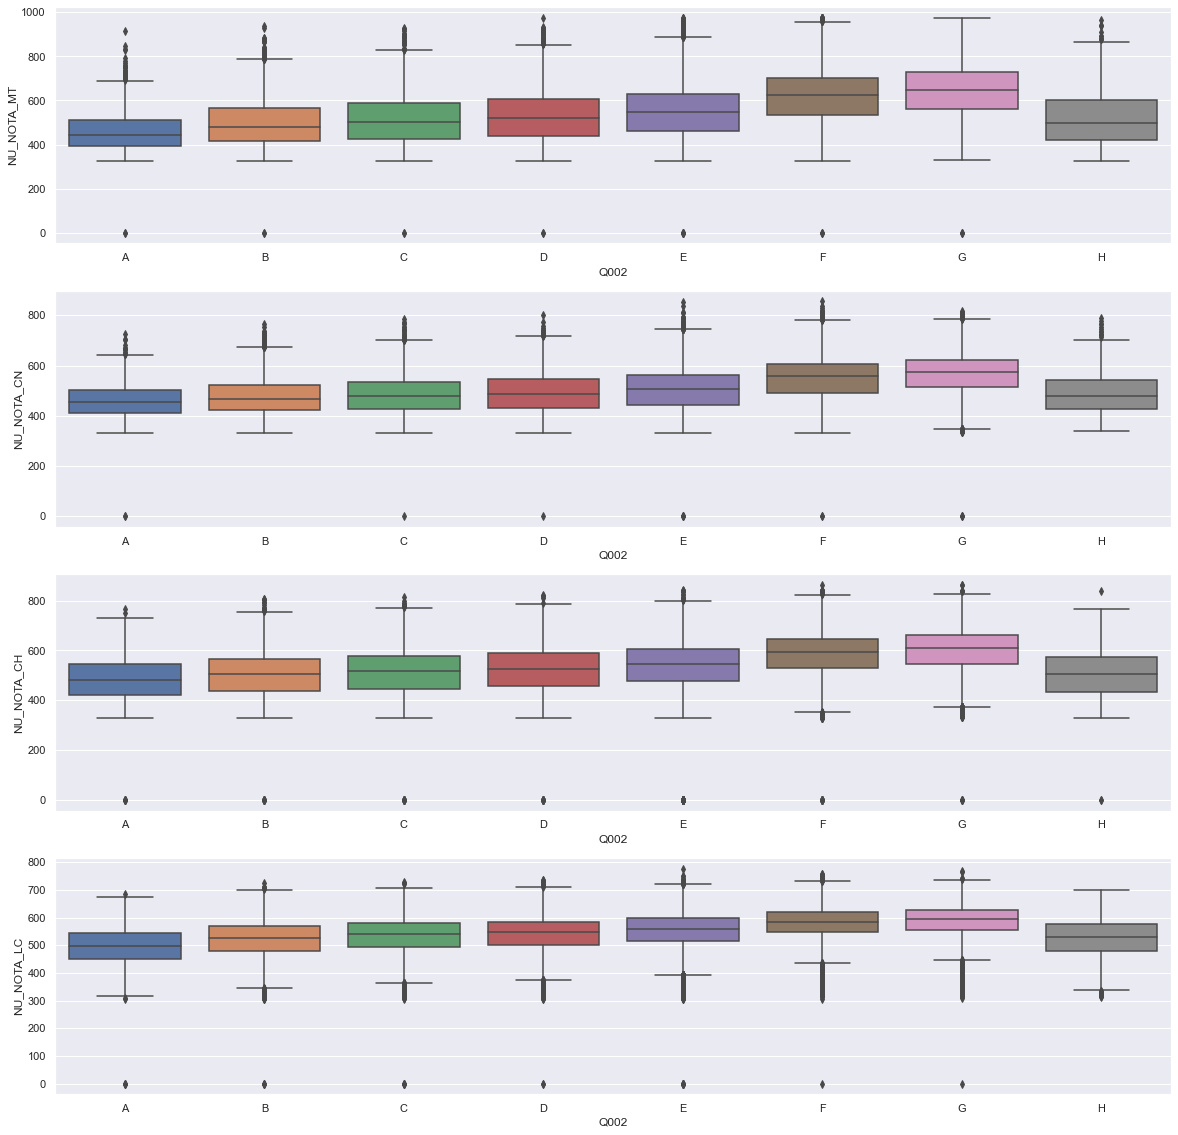

<Figure size 720x1440 with 0 Axes>

In [170]:
#Hipótese 4: Quanto maior a escolaridade dos pais, maior a nota do aluno (criar coluna com a descrição)

#Plotando gráfico com a questão 2 do questionário, questão que pergunta a escolaridade da mãe
df_enem_limpa_ord2 = df_enem_limpa.sort_values(by= ['Q002'])
fig, axs = plt.subplots(nrows=4)
plt.figure(figsize = (10, 20))
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x='Q002', y='NU_NOTA_MT', data=df_enem_limpa_ord2, ax=axs[0])
sns.boxplot(x='Q002', y='NU_NOTA_CN', data=df_enem_limpa_ord2, ax=axs[1])
sns.boxplot(x='Q002',y='NU_NOTA_CH', data=df_enem_limpa_ord2, ax=axs[2])
sns.boxplot(x='Q002',y='NU_NOTA_LC', data=df_enem_limpa_ord2, ax=axs[3])

#Nota-se que quanto maior a escolaridade da mãe, aumenta as chance de o aluno ter uma nota maior nas disciplinas.

In [171]:
#Hipótese 5: Tipo de escola relacionada a nota do aluno.

#Agrupando a média das notas pelo tipo de escola que o aluno estudou o ensino médio
df_enem_escola_nota = df_enem_limpa.groupby(by='TP_ESCOLA')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()
df_enem_escola_nota

C:\Users\epile\AppData\Local\Temp\ipykernel_12568\2035678846.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_enem_escola_nota = df_enem_limpa.groupby(by='TP_ESCOLA')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
TP_ESCOLA,,,,
1,514.150776,547.594871,553.808218,558.381736
2,486.043719,517.818404,538.369723,524.696326
3,552.749186,582.441671,578.740604,624.756391


<AxesSubplot:xlabel='TP_ESCOLA', ylabel='NU_NOTA_LC'>

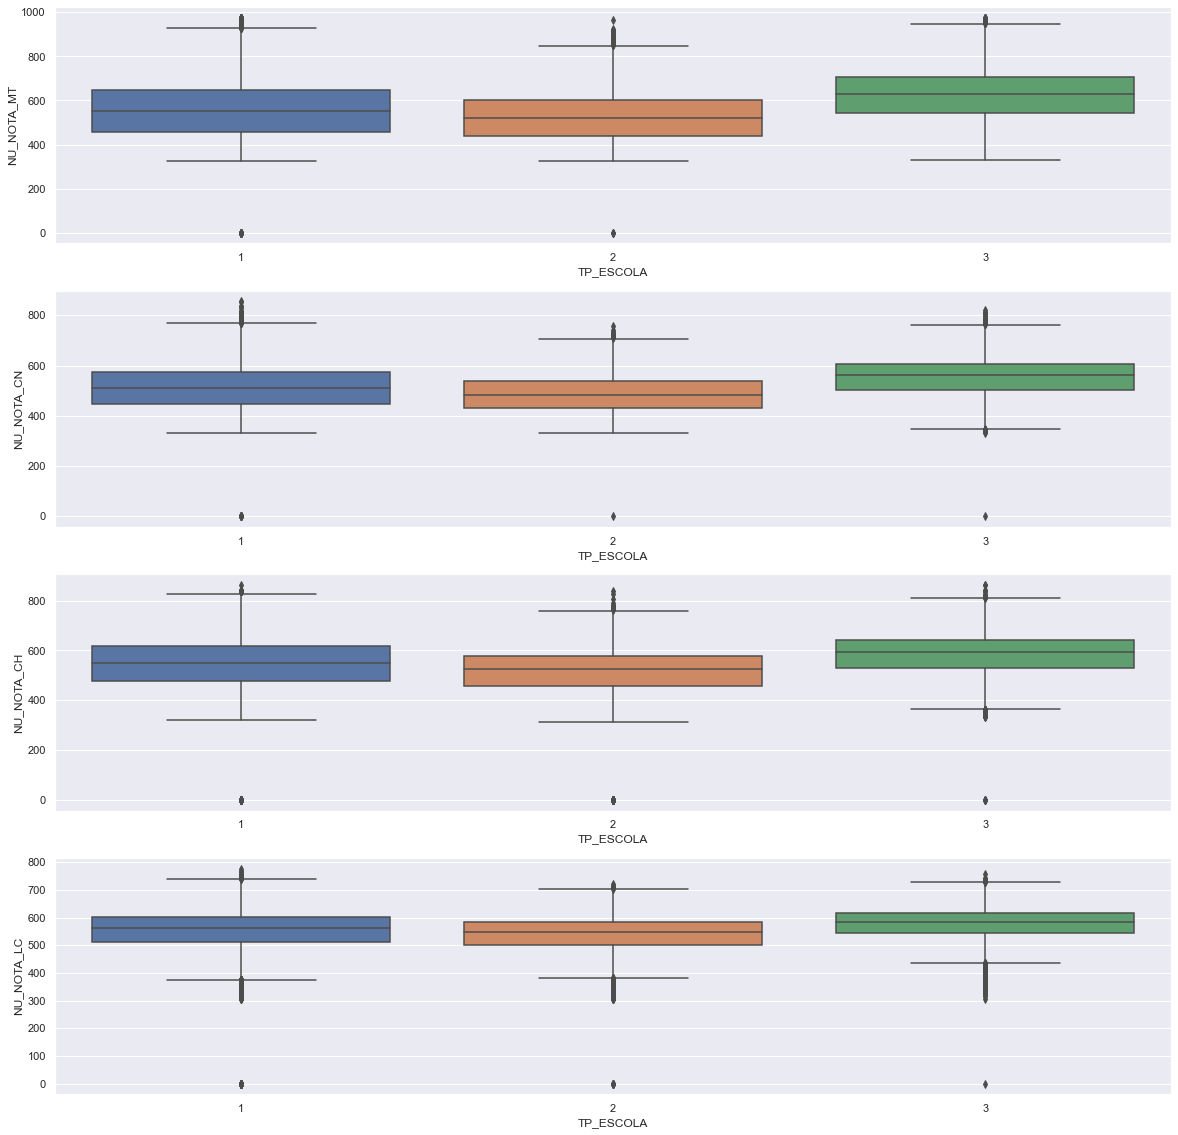

<Figure size 720x1440 with 0 Axes>

In [172]:
#Plotando gráfico tipo boxplot para visualizar comportamento das notas de acordo com o tipo de escola do aluno

fig, axs = plt.subplots(nrows=4)
plt.figure(figsize = (10, 20))
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_MT', data=df_enem_limpa, ax=axs[0])
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_CN', data=df_enem_limpa, ax=axs[1])
sns.boxplot(x='TP_ESCOLA',y='NU_NOTA_CH', data=df_enem_limpa, ax=axs[2])
sns.boxplot(x='TP_ESCOLA',y='NU_NOTA_LC', data=df_enem_limpa, ax=axs[3])

#Nota-se que alunos que vieram de escolas privadas em média tem maior probabilidade de terem notas mais altas

In [173]:
#Hipótese 6: Diferença de nota por gênero.

#Agrupando a média das notas pelo gênero do indivíduo
df_enem_limpa.groupby(by='TP_SEXO')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()

C:\Users\epile\AppData\Local\Temp\ipykernel_12568\3943106970.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_enem_limpa.groupby(by='TP_SEXO')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
TP_SEXO,,,,
F,504.385902,538.410589,552.895858,539.761381
M,528.230339,559.025457,556.504219,591.104814


<AxesSubplot:xlabel='TP_SEXO', ylabel='NU_NOTA_LC'>

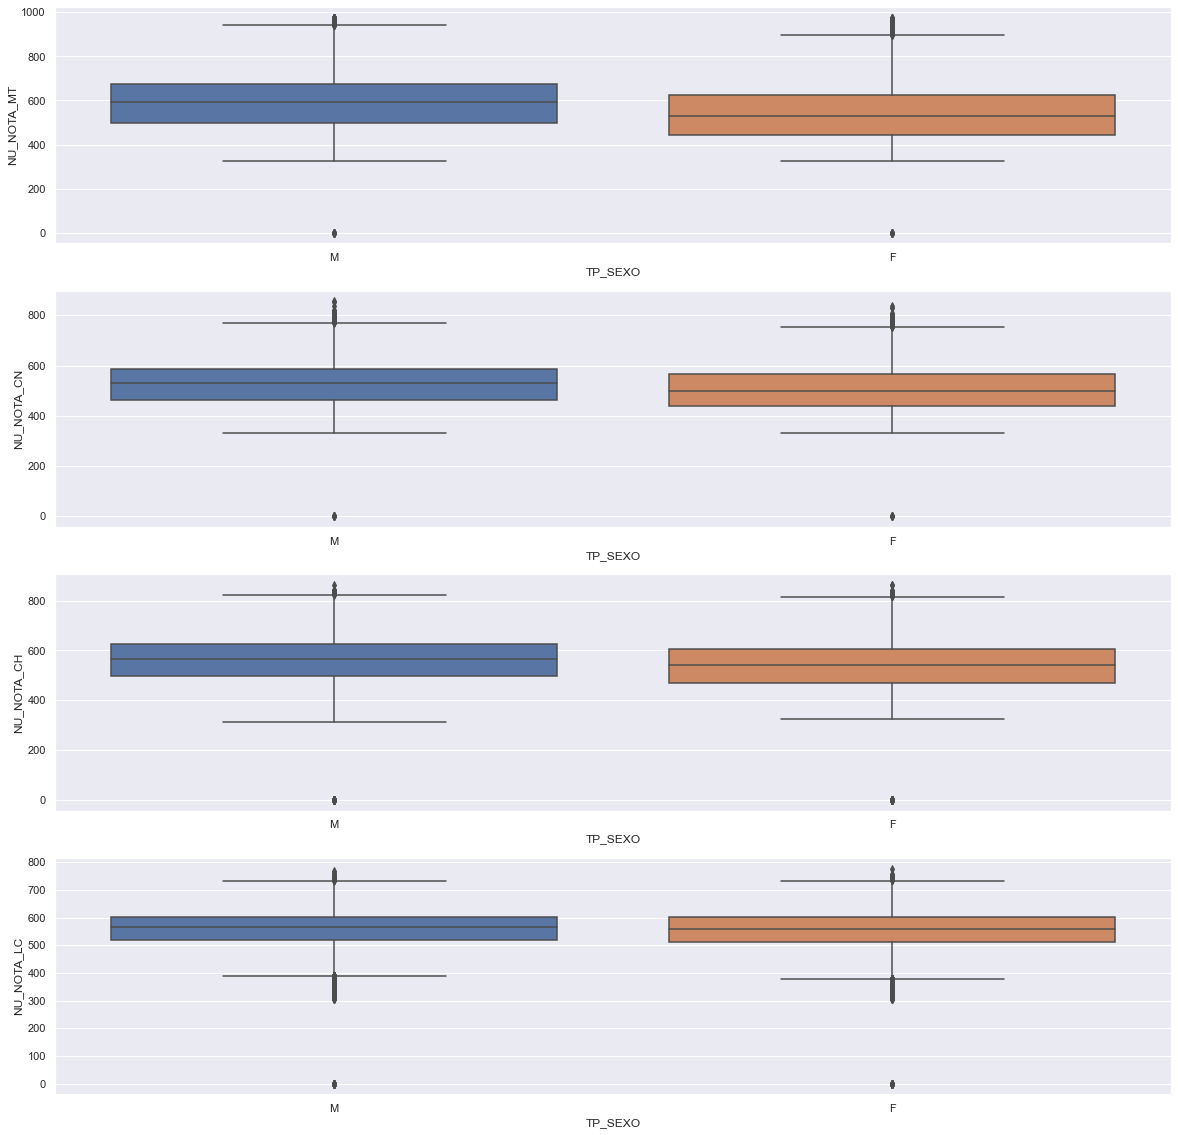

<Figure size 720x1440 with 0 Axes>

In [174]:
#Plotando gráfico tipo boxplot para visualizar comportamento das notas de acordo com o gênero do indivíduo
fig, axs = plt.subplots(nrows=4)
plt.figure(figsize = (10, 20))
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x='TP_SEXO', y='NU_NOTA_MT', data=df_enem_limpa, ax=axs[0])
sns.boxplot(x='TP_SEXO', y='NU_NOTA_CN', data=df_enem_limpa, ax=axs[1])
sns.boxplot(x='TP_SEXO',y='NU_NOTA_CH', data=df_enem_limpa, ax=axs[2])
sns.boxplot(x='TP_SEXO',y='NU_NOTA_LC', data=df_enem_limpa, ax=axs[3])


#Não é possível perceber grande diferença nas notas a partir do gênero do participante